## Clustering

In [12]:
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import numpy as np

In [4]:
data=pd.read_csv('data/dataset.csv')
data.head(5)


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,...,0.0779,0.845,185.655,173533,3,32.94975,9,1,60,NaN
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,...,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,...,0.1190,0.908,115.940,223960,4,37.22663,12,0,60,NaN
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,...,0.0610,0.967,105.592,157907,4,24.75484,8,0,60,NaN
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,...,0.2130,0.906,114.617,245600,4,21.79874,14,0,60,NaN


In [5]:
data_cleaned=data.drop(['track','artist','uri','target'],axis=1)
data_cleaned.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,genre
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,60,NaN
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,60,pop
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,60,NaN
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,60,NaN
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,60,NaN


In [6]:
sc=StandardScaler()
X=data_cleaned.drop(['decade','genre'],axis=1)
X=sc.fit_transform(X)
y_decade=data_cleaned['decade']
y_genre=data_cleaned['genre']

<AxesSubplot:>

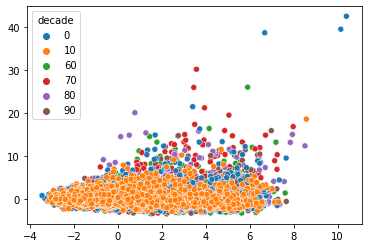

In [7]:
pca_decade=PCA()
x_pca=pca_decade.fit_transform(X)
sns.scatterplot(x=x_pca[:,0],
                y=x_pca[:,1],
                hue=y_decade,
                palette='tab10')

In [8]:
def model_rep(x_data,y_data,y_pred):
    lab=y_pred
    pca=PCA(n_components=2)
    x_pca=pca.fit_transform(x_data)
    fig, axs = plt.subplots(2, figsize=(12, 20))
    sns.scatterplot(x=x_pca[:,0],
                    y=x_pca[:,1],
                    hue=y_data,
                    palette='hls',
                    ax=axs[0]).set_title('Original')
    sns.scatterplot(x=x_pca[:,0],
                    y=x_pca[:,1],
                    hue=lab,
                    palette='hls',
                    ax=axs[1]).set_title('Predicted')

<AxesSubplot:>

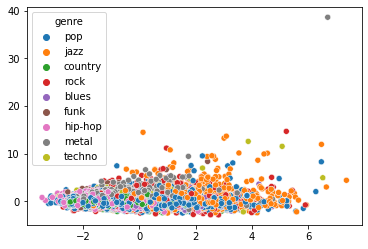

In [9]:
pca_genre=PCA()
x_pca=pca_genre.fit_transform(X)
sns.scatterplot(x=x_pca[:,0],
                y=x_pca[:,1],
                hue=y_genre,
                palette='tab10')

In [9]:
no_genres=len(y_genre.unique())
no_decades=len(y_decade.unique())

## K means

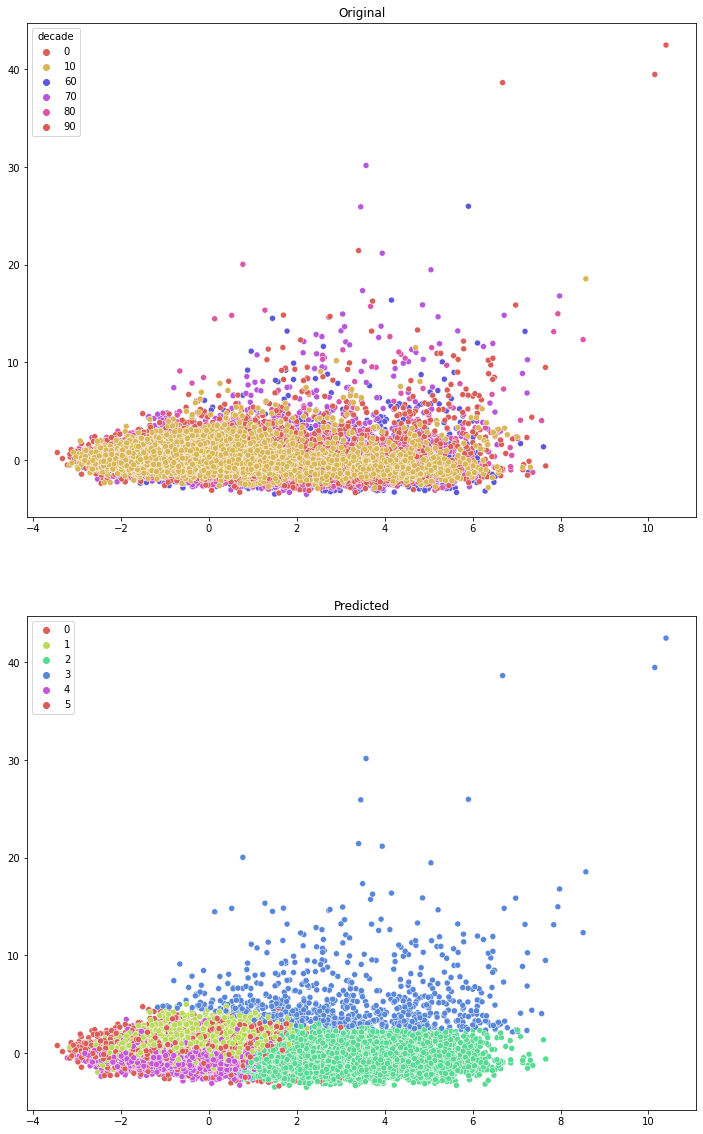

In [10]:
model_decades=KMeans(n_clusters=no_decades,random_state=0)
model_decades.fit(X)
model_rep(X,y_decade,model_decades.predict(X))

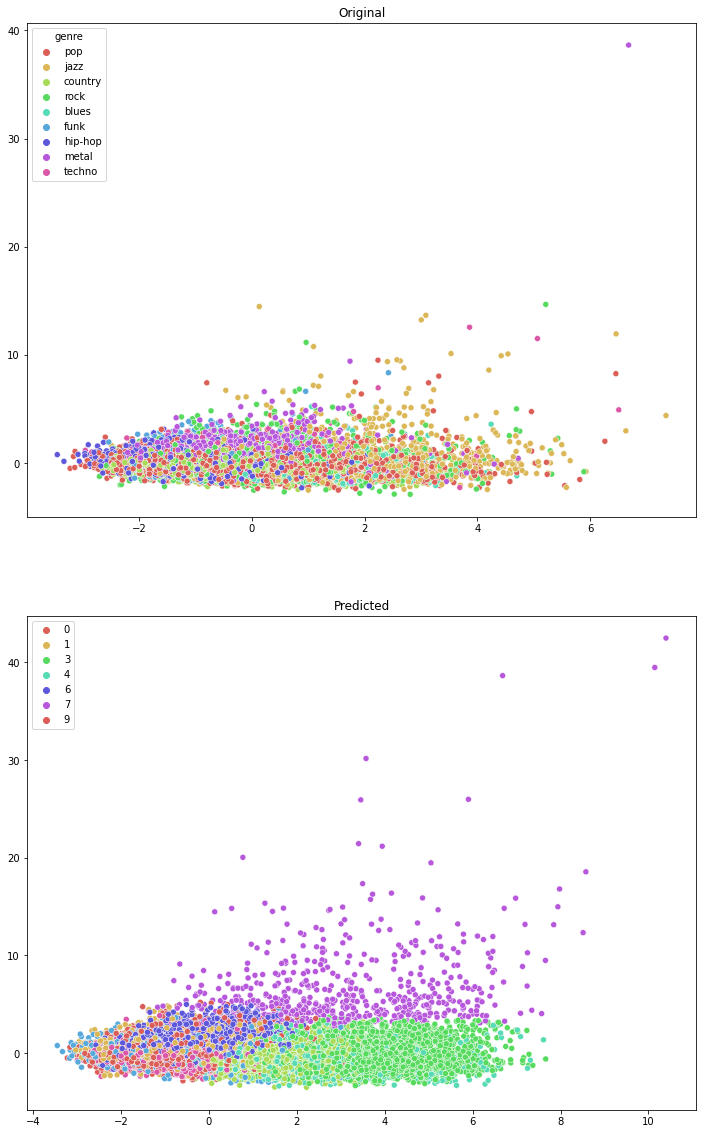

In [11]:
model_genres=KMeans(n_clusters=no_genres,random_state=0)
model_genres.fit(X)
model_rep(X,y_genre,model_genres.predict(X))

In [12]:
SSE=[]
sil_coef=[]
for i in range(1,max(no_genres,no_decades)):
    k_m=KMeans(n_clusters=i)
    k_m.fit(X)
    SSE.append(k_m.inertia_)
    if i<=1: continue
    score=silhouette_score(X,k_m.labels_)
    sil_coef.append(score)
plt.plot(range(1,max(no_genres,no_decades)),SSE)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

KeyboardInterrupt: 

In [ ]:
kl=KneeLocator(range(1,max(no_genres,no_decades)),SSE,curve='convex',direction='decreasing')
kl.elbow

In [ ]:
best_cluster_model=KMeans(n_clusters=kl.elbow)
best_cluster_model.fit(X)
model_rep(X,y_decade,best_cluster_model.predict(X))

## Hierarchical(Agglomerative)

In [13]:
ac_genres=AgglomerativeClustering(n_clusters=no_genres)
ac_genres.fit(X)
model_rep(X,y_genre,ac_genres.labels_)

KeyboardInterrupt: 

Not enough resources


## DBSCAN


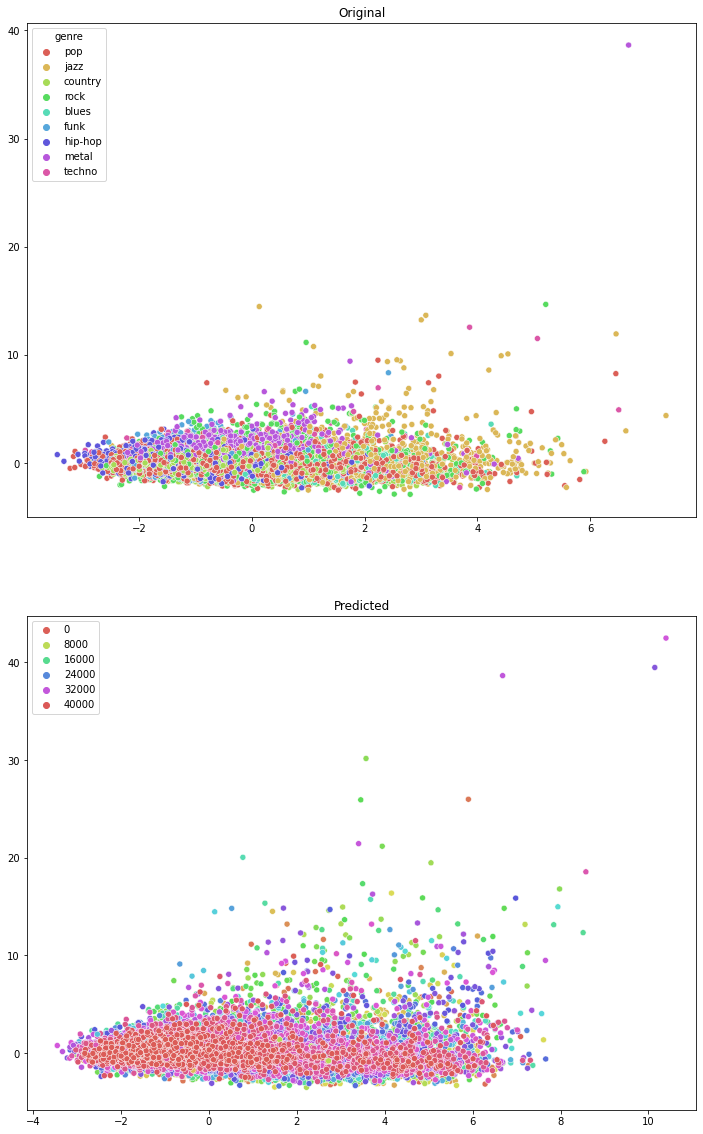

In [10]:
db=DBSCAN(eps=0.1,min_samples=1)
db.fit(X)
model_rep(X,y_genre,db.labels_)

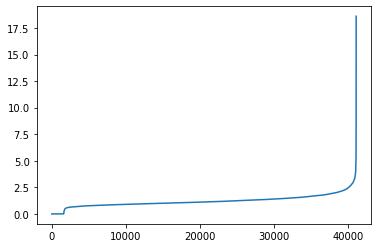

In [13]:
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)


In [28]:
db=DBSCAN(eps=3,min_samples=2*len(X[1]))
db.fit(X)
model_rep(X,y_genre,db.labels_)

KeyboardInterrupt: 